In [1]:
from scipy.sparse import diags #linalg
from scipy.linalg import solve
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation as animation
from IPython.display import HTML
import math

In [2]:
def solver(T,dt, A, C):
    N = int(round(T/dt))
    t = np.linspace(0,T,N+1) #time discrete
    M = int(round(L/dx))
    x = np.linspace(0,L,M+1) #space discrete
    E = np.zeros((M+1,N+1))
    Em_E = np.zeros((M+1,N+1))
    BW = np.zeros((M+1,10))
    B = np.zeros((M+1))
    RHS = np.zeros((M+1))
    gamma = 0.99
   
    Em_E[0,0] = gamma
    
    M1 = Z / dt +  gamma*(A + C)
    B[0] = 0.99
    E[:,1] = np.linalg.solve(M1, B)
   
   
    for n in range(1,N):
        M1 = Z / dt +  gamma*(A + C)
        M2 = Z / dt
        B[0] = 0.99
        RHS[:] = M2.dot(E[:,n]) + B
        E[:,n+1] = np.linalg.solve(M1, RHS) 
        E[M,n+1] = 0
        
    return   E, x, t


In [3]:
from scipy.integrate import quad
#Solving for matrices L1, L2, L3
T = 50
L = 100
l = 1          #element distance
dt = 1         #time step size
dx = 1
N = int(round(T/dt))          #no. of time steps
M = int(round(L/dx))          #no. of nodes

#Solving for A
def integrand(x):
    return -(-1/l)*(1-x/l)
ans1, err = quad(integrand, 0, l)

def integrand(x):
    return -(-1/l)*(x/l)
ans2, err = quad(integrand, 0, l)

def integrand(x):
    return -(1/l)*(1-x/l)
ans3, err = quad(integrand, 0, l)

def integrand(x):
    return -(1/l)*(x/l)
ans4, err = quad(integrand, 0, l)

A = diags([ans3,(ans1+ans4),ans2], [-1,0,1], shape=(M+1, M+1)).toarray()
A[0, 0] = ans1
A[M, M] = ans4

#Solving for C

def integrand(x):
    return (-1/l)*(-1/l)
ans16, err = quad(integrand, 0, l)

def integrand(x):
    return (-1/l)*(1/l)
ans17, err = quad(integrand, 0, l)

def integrand(x):
    return (1/l)*(-1/l)
ans18, err = quad(integrand, 0, l)

def integrand(x):
    return (1/l)*(1/l)
ans19, err = quad(integrand, 0, l)

C = diags([ans18,(ans16+ans19),ans17], [-1,0,1], shape=(M+1, M+1)).toarray()
C[0,0] = ans16
C[M,M] = ans19

#Solving for Z

def integrand(x):
    return (1-x/l)*(1-x/l)
ans20, err = quad(integrand, 0, l)

def integrand(x):
    return (1-x/l)*(x/l)
ans21, err = quad(integrand, 0, l)

def integrand(x):
    return (x/l)*(1-x/l)
ans22, err = quad(integrand, 0, l)

def integrand(x):
    return (x/l)*(x/l)
ans23, err = quad(integrand, 0, l)

Z = diags([ans22,(ans20+ans23),ans21], [-1,0,1], shape=(M+1, M+1)).toarray()
Z[0, 0] = ans20
Z[M, M] = ans23


(E,x,t) = solver(T,dt, A, C)


In [4]:
M = 100
N = 50
X = np.zeros((M+1,N+1))
gamma = 0.99

In [5]:
for n in range(1,N+1):
    for m in range (M+1):
        X[m,n] =(math.exp((1/2)*m-(gamma/4)*n))*0.5*(math.exp((gamma/4)*n-0.5*m)*math.erfc(m/(2*math.sqrt(gamma*n))-math.sqrt((gamma/4)*n))+math.exp((gamma/4)*n+0.5*m)*math.erfc(m/(2*math.sqrt(gamma*n))+math.sqrt((gamma/4)*n)))


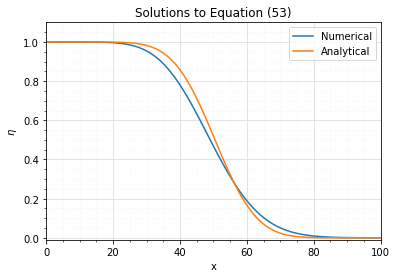

In [6]:
fig, ax = plt.subplots()
ax.axis([0.0,100+0.1,-0.01,1.1]) 
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()

plt.plot(E[:,N])
plt.plot(X[:,N])
plt.legend(["Numerical","Analytical"], loc ="upper right")
plt.xlabel("x")
plt.ylabel("$\eta$")
plt.title("Solutions to Equation (6.23)")
plt.savefig('Analytical and Numerical Solution.png')

plt.show()

In [8]:
print(r_squared_value)

0.9941880132413176


In [7]:
from sklearn.metrics import r2_score
# define x and y
x = E[:,N]
y = X[:,N]
 
# r square estimation
r_squared_value = r2_score(x, y)
